In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from typing import List, Tuple

# Part 1

## Problem 1

In [ ]:
temperature = np.array([78, 85, 92, 88, 76, 95, 89, 84, 91, 87])

# Numpy solution
mean_temperature = np.mean(temperature)
median_temperature = np.median(temperature)
sd_temperature = np.std(temperature, ddof=1)
interquartile_temperature = np.percentile(temperature, 75) - np.percentile(temperature, 25)

print(f"Mean temperature: {mean_temperature}")
print(f"Median temperature: {median_temperature}")
print(f"Standard deviation of temperature: {sd_temperature}")
print(f"Interquartile range of temperature: {interquartile_temperature}")

# Manual solution
print("-" * 54)
def interquartile_range(data: List[float]) -> float:
    """
    Compute the Interquartile Range (IQR) with linear interpolation.

    Args:
        data: A list of numerical values.

    Returns:
        The IQR (75th percentile - 25th percentile), calculated by
        linear interpolation between data points.
    """
    if len(data) < 2:
        raise ValueError("Need at least 2 data points to compute IQR.")
    sorted_data = sorted(data)
    n = len(sorted_data)

    def interpolate_percentile(p: float) -> float:
        pos = (n - 1) * p
        lower_index = int(pos)
        fraction = pos - lower_index
        if lower_index == n - 1:
            return sorted_data[-1]
        return sorted_data[lower_index] + fraction * (sorted_data[lower_index + 1] - sorted_data[lower_index])

    q1 = interpolate_percentile(0.25)
    q3 = interpolate_percentile(0.75)
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    return q3 - q1

mean_temperature = sum(temperature) / len(temperature)
median_temperature = (sorted(temperature)[len(temperature) // 2] + sorted(temperature)[len(temperature) // 2 - 1]) / 2
sd_temperature = (sum([(x - mean_temperature) ** 2 for x in temperature]) / (len(temperature) - 1)) ** 0.5
interquartile_temperature = interquartile_range(temperature)

print(f"Mean temperature: {mean_temperature}")
print(f"Median temperature: {median_temperature}")
print(f"Standard deviation of temperature: {sd_temperature}")
print(f"Interquartile range of temperature: {interquartile_temperature}")

# Find interquartile range using median
print("-" * 54)
def find_median(lst: List[float]) -> float:
    """
    Return the median of a non-empty list of numbers.

    Args:
        lst (List[float]): A non-empty list of numbers.

    Returns:
        float: The median value.
    """
    sorted_lst = sorted(lst)
    n = len(sorted_lst)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_lst[mid - 1] + sorted_lst[mid]) / 2.0
    else:
        return sorted_lst[mid]

def find_quartiles(data: List[float]) -> Tuple[float, float, float]:
    """
    Return the first, second, and third quartiles (Q1, Q2, Q3) of a non-empty list of numbers.

    For an odd-length list, the median (Q2) is excluded from both halves when computing Q1 and Q3.
    
    Args:
        data (List[float]): A non-empty list of numbers.
    
    Returns:
        Tuple[float, float, float]: A tuple containing Q1, Q2, and Q3.
    """
    sorted_data = sorted(data)
    n = len(sorted_data)
    q2 = find_median(sorted_data)

    if n % 2 == 0:
        lower_half = sorted_data[:n // 2]
        upper_half = sorted_data[n // 2:]
    else:
        lower_half = sorted_data[:n // 2]
        upper_half = sorted_data[n // 2 + 1:]
    
    q1 = find_median(lower_half)
    q3 = find_median(upper_half)
    return q1, q2, q3

q1, q2, q3 = find_quartiles(temperature)
iqr = q3 - q1
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Mean temperature: 86.5
Median temperature: 87.5
Standard deviation of temperature: 5.986094998689324
Interquartile range of temperature: 6.25
------------------------------------------------------
Q1: 84.25
Q3: 90.5
Mean temperature: 86.5
Median temperature: 87.5
Standard deviation of temperature: 5.986094998689324
Interquartile range of temperature: 6.25
------------------------------------------------------
Q1: 84
Q3: 91
IQR: 7


## Problem 2

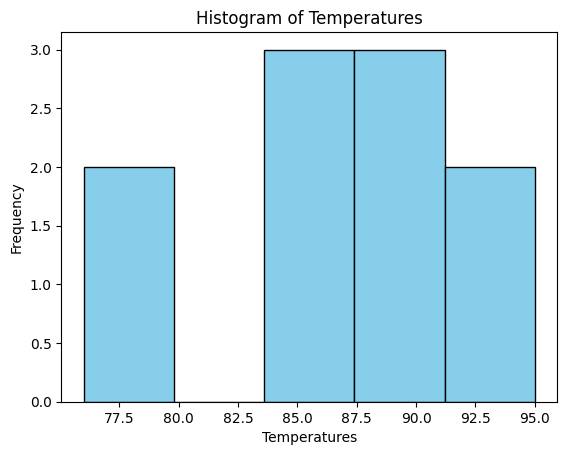

In [69]:

# Histogram of temperature
plt.hist(temperature, bins=5, edgecolor="black", color="skyblue")
plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.title("Histogram of Temperatures")
plt.show()

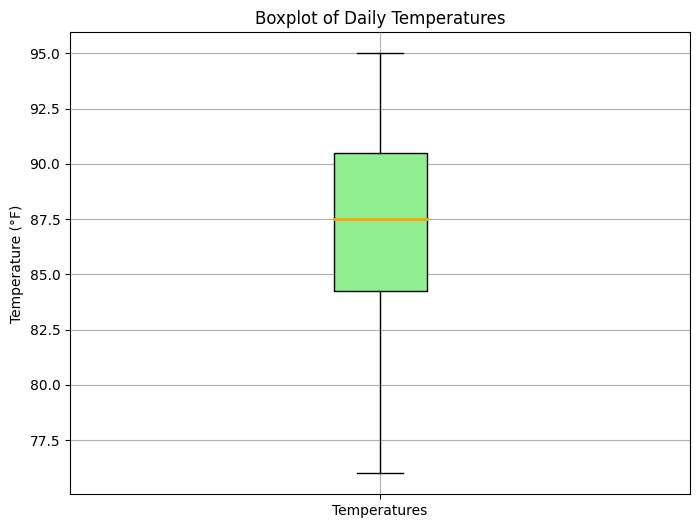

In [51]:
# Boxplot of temperature
plt.figure(figsize=(8, 6))
plt.boxplot(temperature, vert=True, patch_artist=True, showfliers=True,
            boxprops=dict(facecolor="lightgreen", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(marker="o", markerfacecolor="red", markersize=8, linestyle="none"),
            medianprops=dict(color="orange", linewidth=2))


plt.title("Boxplot of Daily Temperatures")
plt.ylabel("Temperature (°F)")
plt.xticks([1], ["Temperatures"])
plt.grid(True)
plt.show()

# Part 2

## Problem 3

In [67]:
fruit_weights = np.array(
    [
        145, 147, 150, 152, 148,
        146, 149, 151, 147, 150,
        148, 146, 149, 152, 150,
        148, 147, 149, 151, 150
    ]
)

population_mean = 150
alpha = 0.05

sample_mean = np.mean(fruit_weights)
sample_std = np.std(fruit_weights, ddof=1)
sample_size = len(fruit_weights)

# calculate the t-statistic and p-value using scipy
t_statistic, p_value = stats.ttest_1samp(fruit_weights, population_mean)

# calculate the t-statistic and p-value manually
standard_error = sample_std / np.sqrt(sample_size)
t_statistic_manual = (sample_mean - population_mean) / standard_error
degrees_of_freedom = sample_size - 1
p_value_manual = stats.t.cdf(t_statistic_manual, df=degrees_of_freedom)*2

if t_statistic == t_statistic_manual and p_value == p_value_manual:
    print("The results are the same.")
else:
    print("The results are different.")

print("-"*70)
print(f"Sample Mean: {sample_mean:.2f} grams")
print(f"Sample Standard Deviation: {sample_std:.2f} grams")
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.4f}")
print("-"*70)

if p_value < alpha:
    print(f"As p-value ({p_value:.4f}) < alpha ({alpha}), reject the null hypothesis.")
    print("Reject the null hypothesis.")
    print("There is statictiscally sufficient evidence to suggest that the \naverage weight of the fruit is significantly different from 150 grams.")
else:
    print(f"As p-value ({p_value:.4f}) >= alpha ({alpha}), fail to reject the null hypothesis.")
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that the average weight of the fruit is significantly different from 150 grams.")

The results are the same.
----------------------------------------------------------------------
Sample Mean: 148.75 grams
Sample Standard Deviation: 2.02 grams
T-statistic: -2.763
P-value: 0.0124
----------------------------------------------------------------------
As p-value (0.0124) < alpha (0.05), reject the null hypothesis.
Reject the null hypothesis.
There is statictiscally sufficient evidence to suggest that the 
average weight of the fruit is significantly different from 150 grams.
